<a href="https://colab.research.google.com/github/Run-Along/data_analytics_2/blob/main/Python/Unit%204%20-%20Machine%20Learning/Assignments/Unit_4_ML_KNN_Class_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KNN classifier

### Suppose we’ve been given a classified data set from a company! They’ve hidden the feature column names but have given you the data and the target classes. We’ll try to use KNN to create a model that directly predicts a class for a new data point based off of the features. Let’s grab it and use it.

# Tasks:



1.   Every step must have an explanation
2.   Every plot/ chart must have an iterpretation
3.   Add your observations for each section
4.   Draw clear conclusions (at least 5 conclusions)

In [32]:
#import the necesssary libraries
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [33]:
#load our dataframe
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/Classified%20Data')

In [34]:
#preview the data frame
df.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


**Note:** The target class column is what we are interested in.

In [35]:
#check to see available column names
df.columns

Index(['Unnamed: 0', 'WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF',
       'HQE', 'NXJ', 'TARGET CLASS'],
      dtype='object')

In [36]:
#drop the unnamed column since we don't have any information about its siginificance
df.drop(['Unnamed: 0'], axis=1, inplace=True)  

In [37]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [38]:
type(df)

pandas.core.frame.DataFrame

In [39]:
#save a copy of our data frame that we will use for manipulations
ad_data = df

In [40]:
#preview to make sure things are loaded properly
print (ad_data) 

          WTT       PTI       EQW  ...       HQE       NXJ  TARGET CLASS
0    0.913917  1.162073  0.567946  ...  0.879422  1.231409             1
1    0.635632  1.003722  0.535342  ...  0.621552  1.492702             0
2    0.721360  1.201493  0.921990  ...  0.957877  1.285597             0
3    1.234204  1.386726  0.653046  ...  1.522692  1.153093             1
4    1.279491  0.949750  0.627280  ...  1.463812  1.419167             1
..        ...       ...       ...  ...       ...       ...           ...
995  1.010953  1.034006  0.853116  ...  1.117340  1.348517             1
996  0.575529  0.955786  0.941835  ...  0.958684  1.663489             0
997  1.135470  0.982462  0.781905  ...  0.919191  1.385504             1
998  1.084894  0.861769  0.407158  ...  1.277456  1.188063             1
999  0.837460  0.961184  0.417006  ...  1.257190  1.364837             1

[1000 rows x 11 columns]


In [41]:
#import standard scaler
#this will allow us to normalize our data while preserving proportions
from sklearn.preprocessing import StandardScaler

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

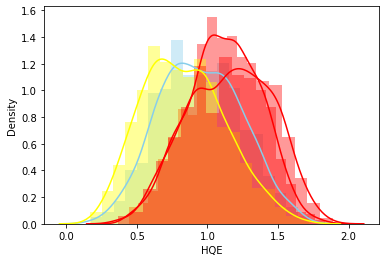

In [42]:
#plot every column in one distribution plot
sns.distplot( ad_data["WTT"] , color="skyblue")
sns.distplot( ad_data["PTI"] , color="red")
sns.distplot( ad_data["EQW"] , color="yellow")
sns.distplot( ad_data["HQE"] , color="red")

In [12]:
# define scaler
scalar = StandardScaler()

In [13]:
#calculates statistics for the target class. namely mean and standard deviation

scalar.fit(df.drop('TARGET CLASS', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [14]:
# transform data
scaled_features = scalar.transform(df.drop('TARGET CLASS', axis=1))

In [15]:
df_feature = pd.DataFrame(scaled_features, columns=df.columns[:-1])

In [16]:
X = df.drop('TARGET CLASS',axis=1).values

In [17]:
# let us preview the scaled data
df_feature.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

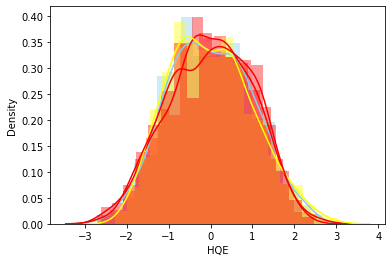

In [43]:
# after scaling let's compare the columns 
sns.distplot( df_feature["WTT"] , color="skyblue")
sns.distplot( df_feature["PTI"] , color="red")
sns.distplot( df_feature["EQW"] , color="yellow")
sns.distplot( df_feature["HQE"] , color="red")


## scikit-learn 4-step modeling pattern


Step 1 train and test your model
Import the library


With sklearn.model_selection.train_test_split you are creating 4 portions of data which will be used for fitting & predicting values.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4,random_state=42) 

X_train, X_test, y_train, y_test
Now

1). X_train - This includes your all independent variables,these will be used to train the model, also as we have specified the test_size = 0.4, this means 60% of observations from your complete data will be used to train/fit the model and rest 40% will be used to test the model.

2). X_test - This is remaining 40% portion of the independent variables from the data which will not be used in the training phase and will be used to make predictions to test the accuracy of the model.

3). y_train - This is your dependent variable which needs to be predicted by this model, this includes category labels against your independent variables, we need to specify our dependent variable while training/fitting the model.

4). y_test - This data has category labels for your test data, these labels will be used to test the accuracy between actual and predicted categories.

Now you can fit a model on this data, let's fit sklearn.linear_model.LogisticRegression



In [19]:
#import the train_test_split 
from sklearn.model_selection import train_test_split

In [20]:
#remember target class is our column of interest
#our training and testing X will use the scaled data frame (all columns except target class)
#our training y and testing y are the output 'target class' values.
X_train, X_test, y_train, y_test  = train_test_split(scaled_features, df['TARGET CLASS'], test_size =0.3)

In [44]:
print ("X_train: ", X_train)
print ("y_train: ", y_train)

print ("y_test: ", y_test)

X_train:  [[-0.26710975  1.15161605  0.56119462 ...  1.26315187  0.02444444
   1.37195095]
 [ 1.437721    0.32817237 -0.64619193 ... -1.67155193  0.58766335
   0.37423426]
 [ 1.00329597  0.0697683  -1.04432558 ... -0.37333614 -0.26537021
  -1.09542768]
 ...
 [ 1.38132179 -1.40874591 -0.79526154 ... -0.06092917  0.5448613
   0.25607916]
 [-1.09258993 -0.42732091  1.42062238 ...  0.11128024 -0.72319106
   2.28568373]
 [ 1.07800403  0.71446851 -0.23855274 ... -0.05659155  0.9768967
  -1.39441633]]
y_train:  217    0
937    1
410    1
941    1
58     1
      ..
294    1
626    0
175    1
970    0
74     1
Name: TARGET CLASS, Length: 700, dtype: int64
y_test:  75     0
869    0
944    0
605    0
623    1
      ..
288    0
523    1
448    0
417    0
749    0
Name: TARGET CLASS, Length: 300, dtype: int64


Name of the object does not matter
Can specify tuning parameters (aka "hyperparameters") during this step
All parameters not specified are set to their defaults

In [45]:
#import the cluster classifier
from sklearn.neighbors import  KNeighborsClassifier

In [50]:
#use knn for easier function calls
#our k value is 1
knn = KNeighborsClassifier(n_neighbors=1)

In [51]:
#fit the data to the training X and training y
#it will generate values we can predict against
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [52]:
#use the testing data to predict the results
predict = knn.predict(X_test)

In [53]:
predict 

array([0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [54]:
#  classification_report, confusion_matrix objects within sklearn.metrics 
from sklearn.metrics import  classification_report, confusion_matrix

In [55]:
#A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, 
# where N is the number of target classes. The matrix compares the actual target values with those predicted
print(confusion_matrix(y_test,predict))

[[141   7]
 [ 13 139]]


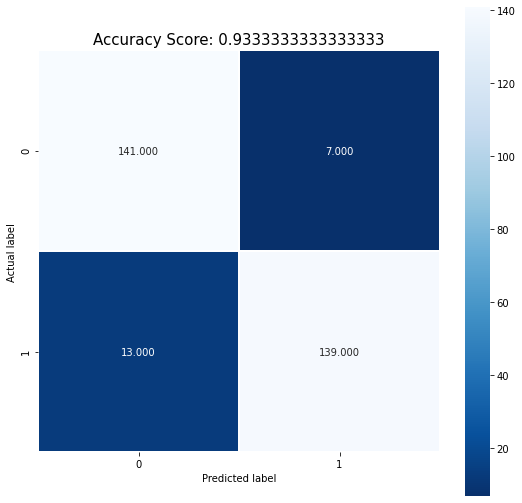

In [56]:
#a heatmap of our confusion matrix
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(y_test, predict), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(knn.score(X_test, y_test))
plt.title(all_sample_title, size = 15);

In [58]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       148
           1       0.95      0.91      0.93       152

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



In [61]:
# The sklearn. metrics module implements several loss, score, and utility functions to measure classification performance
# Calculating the acuracy score (y_test vs y_predect)
from sklearn import metrics
first_trial = []
first_trial.append(metrics.accuracy_score(y_test,y_pred))
print(first_trial)

NameError: ignored

# Repeat above steps for K = 5, see what happens with Accuracy

In [62]:
knn = KNeighborsClassifier(n_neighbors=5)

In [63]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [64]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [65]:
predict = knn.predict(X_test)

In [66]:
predict 

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0])

In [67]:
print(confusion_matrix(y_test,predict))

[[143   5]
 [  7 145]]


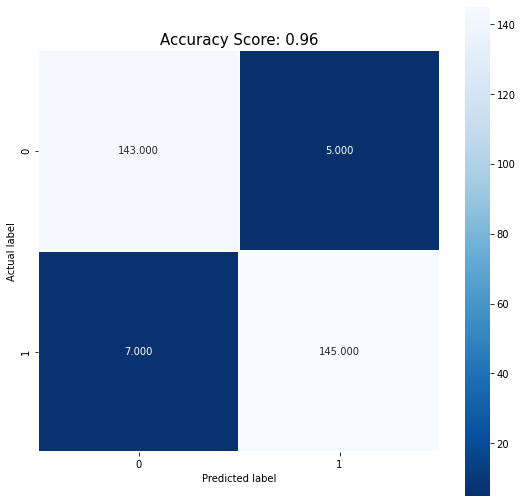

In [68]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(y_test, predict), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(knn.score(X_test, y_test))
plt.title(all_sample_title, size = 15);

In [69]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       148
           1       0.97      0.95      0.96       152

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



# K Value and Accuracy
Selecting the optimal K value to achieve the maximum accuracy of the model 
Initialize a random K value and start computing.
Derive a plot between error rate and K denoting values in a defined range. Then choose the K value as having a minimum error rate.


In [71]:
#import numpy
import numpy as np

Now it’s time to improve the model and find out the optimal k value.


In [72]:
from sklearn import metrics

In [73]:
#create an empty list
score =[]

In [74]:
# Run for k from 1 to 39
# Pssing the value of K to KNeighborsClassifier
# and calculating the acuracy score (y_test vs y_predect)
for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  score.append(metrics.accuracy_score(y_test,y_pred))

print(score)

[0.9333333333333333, 0.9033333333333333, 0.9566666666666667, 0.9533333333333334, 0.96, 0.9433333333333334, 0.9566666666666667, 0.9566666666666667, 0.95, 0.9533333333333334, 0.95, 0.95, 0.9533333333333334, 0.9533333333333334, 0.9466666666666667, 0.95, 0.95, 0.9533333333333334, 0.9566666666666667, 0.96, 0.9533333333333334, 0.9566666666666667, 0.95, 0.9533333333333334, 0.9533333333333334, 0.9566666666666667, 0.95, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334, 0.9466666666666667, 0.95, 0.9466666666666667, 0.95, 0.9433333333333334, 0.95, 0.9466666666666667, 0.95, 0.95]


Text(0, 0.5, 'Testing Accuracy')

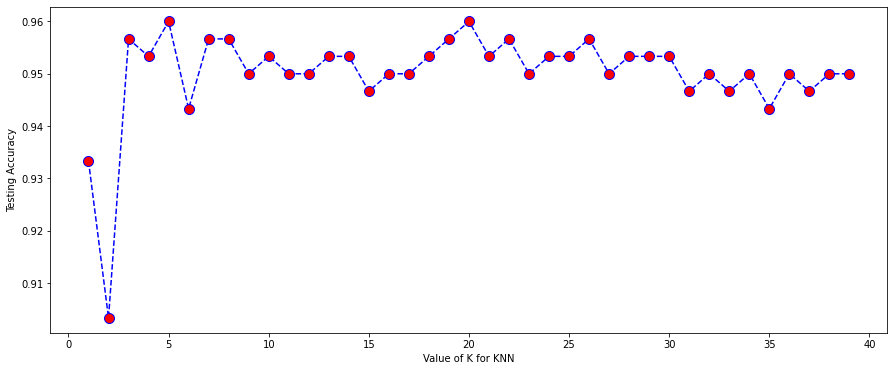

In [75]:
#plot our data to see our optimum k value
plt.figure(figsize=(15,6))
plt.plot(range(1,40),score, color='blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')


#Error Rate and K value

In [78]:
error_rate = []
# Might take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Minimum error:- 0.04 at K = 4
Maximum error:- 0.09666666666666666 at K = 1


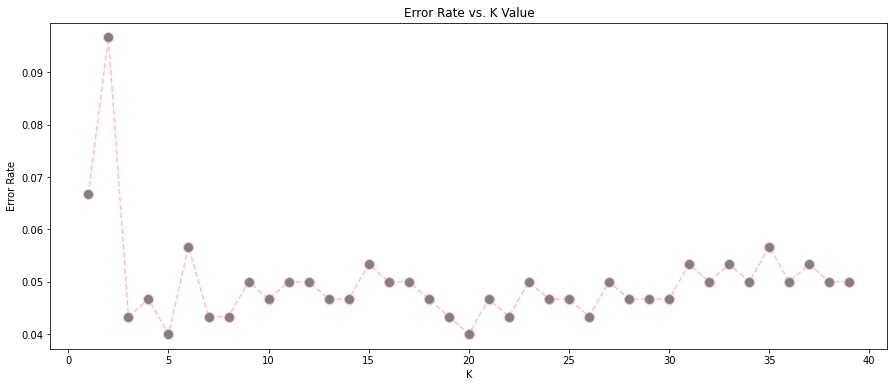

In [79]:
plt.figure(figsize=(15,6))
plt.plot(range(1,40),error_rate,color='pink', linestyle='dashed', marker='o',
         markerfacecolor='gray', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))
print("Maximum error:-",max(error_rate),"at K =",error_rate.index(max(error_rate)))
#print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

# Conclusion

With a k value of 1 we observe a precision value of 0.92 and a recall 0.95.

With a k value of 5 we observe a precision value of 0.95 and a recall of 0.97.

This tells us that in this instance our higher k value produced more accurate predictions. 

Our precision which measures the veracity of our model and our recall which measures our proportion of postive predicted vs positive actual value was significanly more accurate with higher k values.

We also measured the optimum k value and observe through the graph that our best k value is either 5 or 20.

Our clustering model is accurate in this case and we can confidently use this model to make future predictions.